# NYC Harasment Complaints Data Analysis

This notebook contains snippets that intend to dive into the [NYC Complaints data set](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-YTD/5uac-w243) and investigate trends of complaints about harasment (all records where PD_DESC ctonains the work HARASMENT). I am particulraly interested in seeing whether harasment in public places increased during the presidential election campaign and partiulary after the outcome of the presidential election.

In [1]:
%matplotlib inline
import pandas
import folium
import datetime 
import matplotlib
import matplotlib.pyplot as plt

DATA_FILE_PATH = 'NYPD_Complaint_Data_Current_YTD.csv'

In [2]:
# parsing data
fullData = pandas.read_csv(DATA_FILE_PATH, sep=',')
print(str(len(fullData)) + ' records in the original data set.')

# parsing dates
fullData['CMPLNT_FR_DT'] = pandas.to_datetime(fullData['CMPLNT_FR_DT'], errors='ignore', format='%m/%d/%Y')
fullData['CMPLNT_TO_DT'] = pandas.to_datetime(fullData['CMPLNT_TO_DT'], errors='ignore', format='%m/%d/%Y')

# select 2016 only
fullData = fullData[fullData['CMPLNT_FR_DT'].str.contains('2016')==True]
fullData['CMPLNT_FR_DT']
print(str(len(fullData)) + ' records in the 2016 data.')
fullData = fullData.sort_values(['CMPLNT_FR_DT'], ascending=True)
fullData['COUNT'] = 1

# select harassment records only 
harassmentData = fullData[fullData['PD_DESC'].str.contains("HARASSMENT")==True].sort_values(['CMPLNT_FR_DT'])
print(str(len(harassmentData)) + ' records in the 2016 harassment data.')

478804 records in the original data set.
468290 records in the 2016 data.
85791 records in the 2016 harassment data.


### General Complaint Types
First we look at the different description types of complaints in general in 2016:

There are 351 diffreent description types in the data set


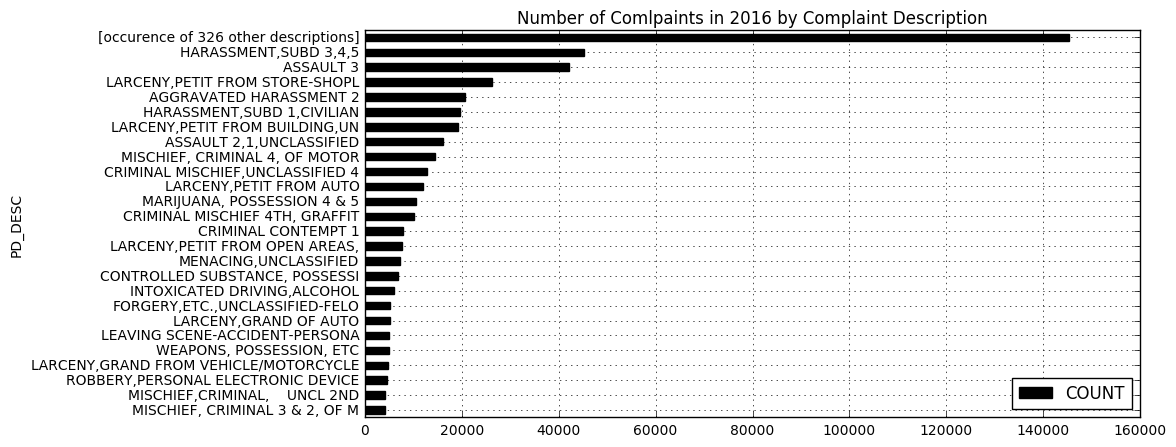

In [34]:
# summing all description types
descriptionTypeCount = len(fullData['PD_DESC'].value_counts())
print('There are ' + str(descriptionTypeCount) + ' diffreent description types in the data set')
descriptionAllTotals = pandas.DataFrame(fullData.groupby(['PD_DESC'])['COUNT'].sum())

#setting boundries for the chart
head = 25
tail = descriptionTypeCount - head

# combining all description that aren't in the top records
descriptionAllTotals = descriptionAllTotals.sort_values(['COUNT'], ascending=False)
descriptionTopTotals = descriptionAllTotals.head(head).reset_index()
otherDescriptionsAmount = descriptionAllTotals.tail(tail)['COUNT'].sum()
otherDescriptionsRow = pandas.DataFrame([['[occurence of '+str(tail)+' other descriptions]', otherDescriptionsAmount]], columns=['PD_DESC', 'COUNT'])
descriptionTotals = descriptionTopTotals.append(otherDescriptionsRow)

# plot the description amounts
plt.rcParams["figure.figsize"] = [10,5]
descriptionTotals = descriptionTotals.sort_values(['COUNT'], ascending=True)
descriptionTotals = descriptionTotals.set_index('PD_DESC')
descriptionTotals.plot.barh(facecolor='k');
plt.title('Number of Comlpaints in 2016 by Complaint Description')
plt.grid()

Displaying the sum of all complaint types of 2016 in the chart above, we can see that harasment complaints are the most common complaint, particulary the 'HARASMENT,SUB 3,4,5' type. The other harasment type ('HARASMENT,SUBD 1,CILIVIAN) is the fith common complaint type in 2016. We can also see that there is very a long tail of 326 different complaint types. 

### Harasment Locations
Looking only at harasment complaints and breaking the data down by their reported location, we can below see that the vast majroity of harasment appears to happen within a residential house or apartment. "Street" is third most common location reported harasment appears to take place.

There are 70 diffreent location types in the data set


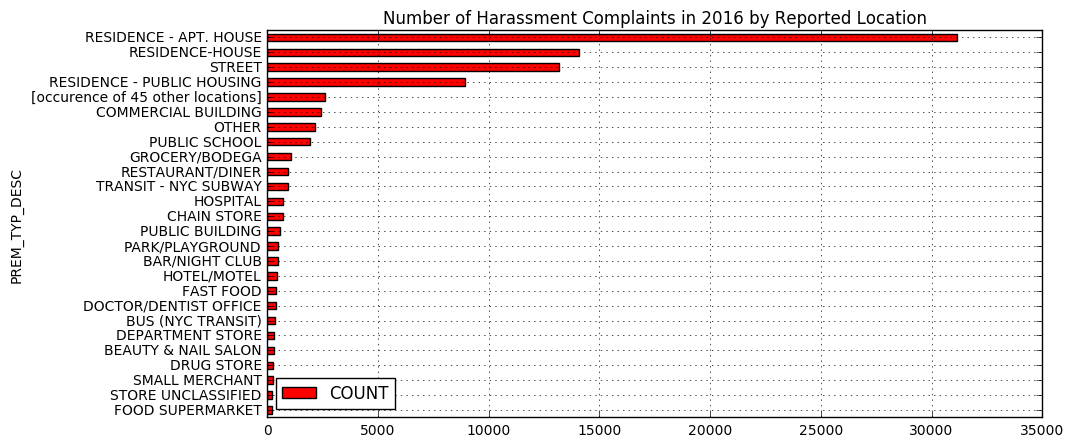

In [6]:
locationTypeCount = len(harassmentData['PREM_TYP_DESC'].value_counts())
print('There are ' + str(locationTypeCount) + ' diffreent location types in the data set')

harassmentDataTotals = pandas.DataFrame(harassmentData.groupby(['PREM_TYP_DESC'])['COUNT'].sum())

#setting boundries for the chart
head = 25
tail = locationTypeCount - head

# combining all location types that aren't in the top records
harassmentDataTotals = harassmentDataTotals.sort_values(['COUNT'], ascending=False)
harassmentDataTopTotals = harassmentDataTotals.head(25)
otherLocationAmount = harassmentDataTotals.tail(locationTypeCount-25)['COUNT'].sum()
otherLocationRow = pandas.DataFrame([['[occurence of '+str(tail)+' other locations]', otherLocationAmount]], columns=['PREM_TYP_DESC', 'COUNT']).set_index('PREM_TYP_DESC')
harassmentDataFilteredTotals = harassmentDataTopTotals.append(otherLocationRow)

# plot the location amounts
plt.rcParams["figure.figsize"] = [10,5]
harassmentDataFilteredTotals = harassmentDataFilteredTotals.sort_values(['COUNT'], ascending=True)
harassmentDataFilteredTotals.plot.barh(facecolor='r');
plt.title('Number of Harassment Complaints in 2016 by Reported Location')
plt.grid()

Looking at the weekly and monthly trends and means, we can see that there are on average 235 harasment complaints each day, 1612 each week and 6446 every month. August has been the month with the most harasment complaints in 2016 so far. There does not seem to be an increase between Q2 and Q3 and we have no data for Q4 yet.

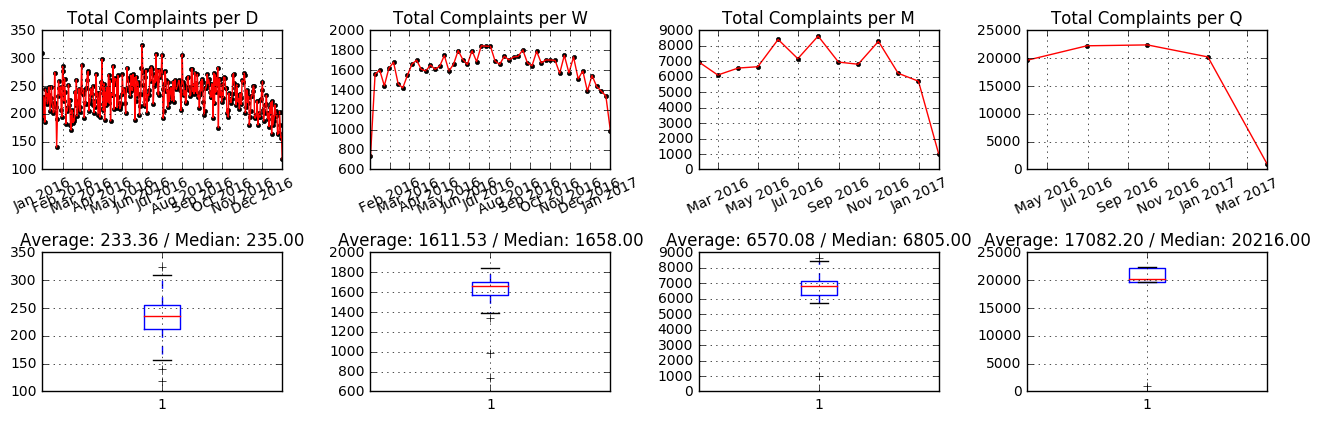

In [39]:
plt.rcParams["figure.figsize"] = [13,13]

harassmentDataTimeSeries = pandas.DataFrame(harassmentData.groupby(['CMPLNT_FR_DT','PREM_TYP_DESC'])['COUNT'].sum()).reset_index()
harassmentDataTimeSeries = harassmentDataTimeSeries.sort_values(['CMPLNT_FR_DT'])
monthlyHarassmentDataTimeSeries = harassmentDataTimeSeries.set_index(pandas.DatetimeIndex(harassmentDataTimeSeries['CMPLNT_FR_DT']))

timeAggs = ['D','W','M','Q']
i = 1

for timeAgg in timeAggs:
    monthlyHarassmentDataTimeSeries = monthlyHarassmentDataTimeSeries.resample(timeAgg).sum()
    plt.subplot(6, 4, i)
    plt.tight_layout()
    plt.xticks(rotation=25)
    plt.title('Total Complaints per '+timeAgg)
    plt.plot(monthlyHarassmentDataTimeSeries, 'k.', monthlyHarassmentDataTimeSeries, 'r-')
    plt.grid()
    plt.subplot(6, 4, i+4)
    plt.tight_layout()
    plt.boxplot(monthlyHarassmentDataTimeSeries['COUNT'])
    plt.title('Average: '+str('%.2f' % monthlyHarassmentDataTimeSeries.mean().COUNT)+' / Median: '+str('%.2f' % monthlyHarassmentDataTimeSeries.median().COUNT))
    plt.grid()
    i+=1

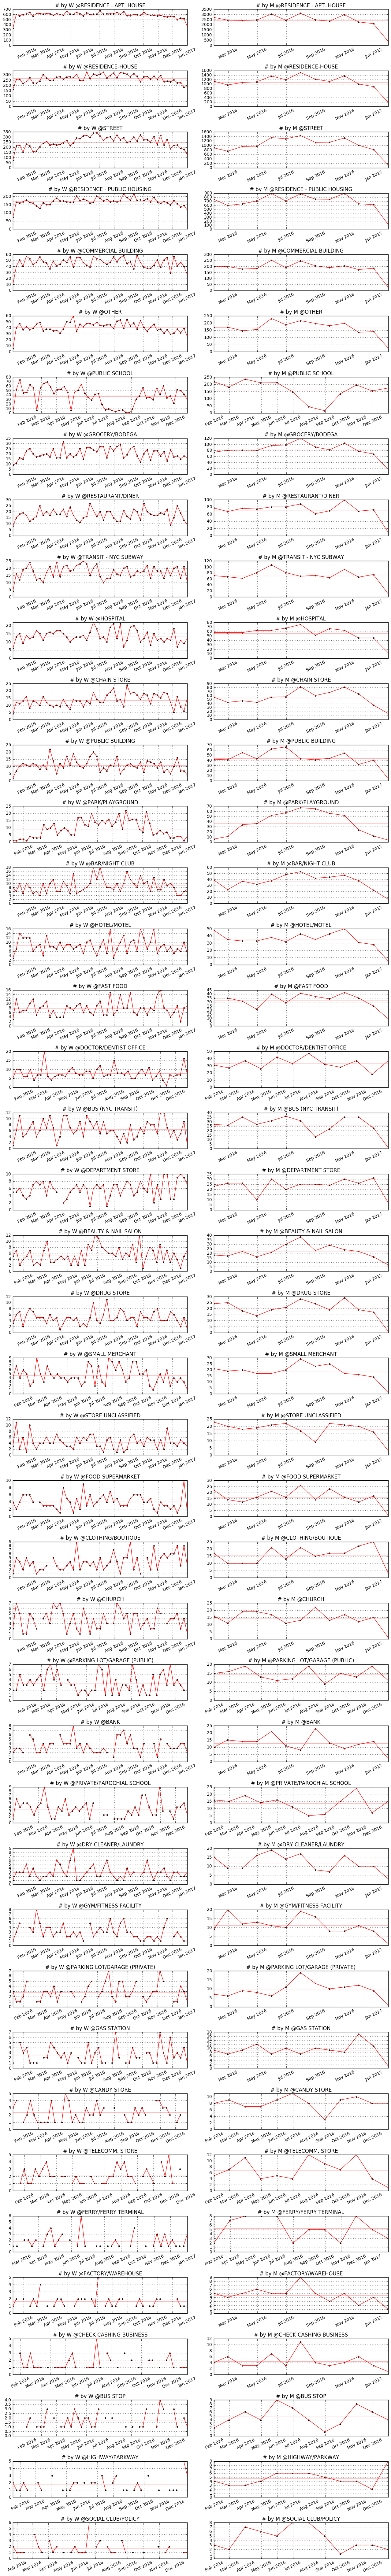

In [13]:
descArr = harassmentDataTotals.reset_index()['PREM_TYP_DESC'].tolist()
plt.rcParams["figure.figsize"] = [13,len(descArr)*2]
timeAggs = ['W','M']
i = 1

for desc in descArr:
    tempDF = pandas.DataFrame(harassmentDataTimeSeries[(harassmentDataTimeSeries['PREM_TYP_DESC'] == desc)]) 
    if(tempDF.COUNT.sum() > 50):
        tempDF = tempDF.set_index(pandas.DatetimeIndex(tempDF['CMPLNT_FR_DT']))
        for timeAgg in timeAggs:    
            tempDF = tempDF.resample(timeAgg).sum()
            plt.subplot(len(descArr), 2, i)
            plt.tight_layout()
            plt.plot(tempDF, 'k.', tempDF, 'r-')
            plt.title('# by '+timeAgg+' @'+desc)
            plt.ylim(ymin=0)
            plt.xticks(rotation=25)
            plt.grid()
            plt.axhline(tempDF.COUNT.mean(), color='red', alpha=0.3)
            i+=1

Digging through the small multiples above that show the weekly and monthly trend of harasment complaints for each location, we can see that most amounts stay relatively consistent over time. However, '**Street**' and '**Playground**' seem to be have been rising throughout the year.

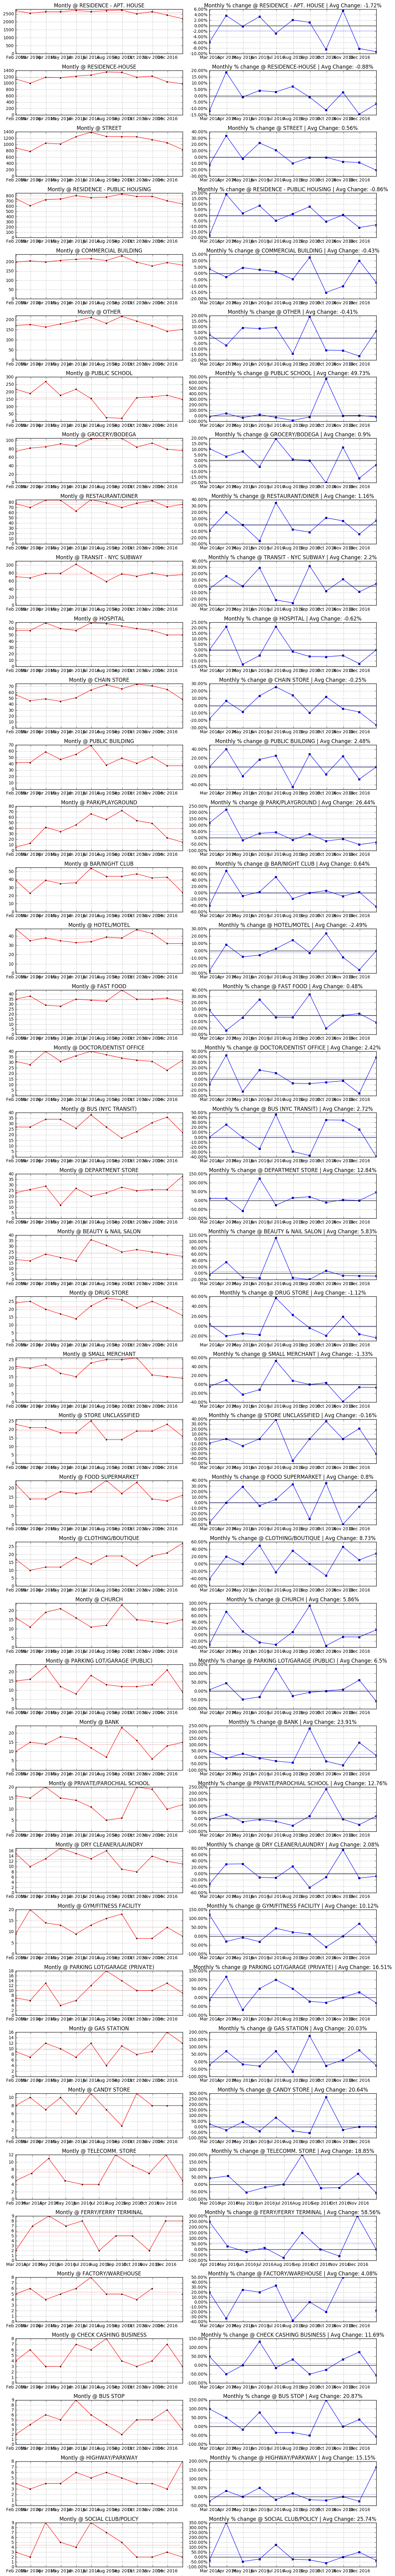

In [43]:
# TO DO: order charts below by sum of percChange DESC

descArr = harassmentDataTotals.reset_index()['PREM_TYP_DESC'].tolist()
plt.rcParams["figure.figsize"] = [13,len(descArr)*2]
i = 1

for desc in descArr:
    tempDF = pandas.DataFrame(harassmentDataTimeSeries[(harassmentDataTimeSeries['PREM_TYP_DESC'] == desc)]) 
    if(tempDF.COUNT.sum() > 50):
        tempDF = tempDF.set_index(pandas.DatetimeIndex(tempDF['CMPLNT_FR_DT']))
        tempDF = tempDF.resample("M").sum()
        plt.subplot(len(descArr), 2, i)
        plt.tight_layout()
        plt.plot(tempDF, 'k.', tempDF, 'r-')
        plt.title('Montly @ ' + desc)
        plt.ylim(ymin=0)
        plt.grid()
        plt.axhline(tempDF.COUNT.mean(), color='red', alpha=0.3)
        i+=1       
        tempDF = tempDF.pct_change();
        ax = plt.subplot(len(descArr), 2, i)
        plt.plot(tempDF, 'bs', tempDF, 'b-', markersize=5)
        plt.title('Monthly % change @ ' + desc + ' | Avg Change: '+str(round(tempDF.COUNT.mean()*100,2))+'%')
        plt.grid()
        plt.axhline(0, color='black')
        plt.axhline(tempDF.COUNT.mean(), color='blue', alpha=0.3)
        vals = ax.get_yticks()
        ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
        i+=1

In [31]:
streetHarassmentData = harassmentData[harassmentData['PREM_TYP_DESC'] == 'STREET']
streetHarassmentData = pandas.DataFrame(streetHarassmentData.groupby(['Latitude','Longitude'])['COUNT'].sum())
streetHarassmentData = streetHarassmentData.reset_index()
streetHarassmentData = streetHarassmentData.round(2)
streetHarassmentData = pandas.DataFrame(streetHarassmentData.groupby(['Latitude','Longitude'])['COUNT'].sum())
streetHarassmentData = streetHarassmentData.reset_index()

map_2 = folium.Map(location=[40.729771, -73.997263], tiles='Stamen Toner', zoom_start=11)
lat_list = streetHarassmentData['Latitude'].tolist()
lon_list = streetHarassmentData['Longitude'].tolist()
con_list = streetHarassmentData['COUNT'].tolist()

for i in range(0, len(lat_list)):
    folium.CircleMarker(
        location=[lat_list[i],lon_list[i]], 
        radius=con_list[i]*10, 
        color='#8B0000', 
        fill_color='#8B0000'
    ).add_to(map_2)       

map_2

In [42]:
streetHarassmentData = harassmentData[harassmentData['PREM_TYP_DESC'] == 'RESIDENCE-HOUSE']
streetHarassmentData = pandas.DataFrame(streetHarassmentData.groupby(['Latitude','Longitude'])['COUNT'].sum())
streetHarassmentData = streetHarassmentData.reset_index()
streetHarassmentData = streetHarassmentData.round(2)
streetHarassmentData = pandas.DataFrame(streetHarassmentData.groupby(['Latitude','Longitude'])['COUNT'].sum())
streetHarassmentData = streetHarassmentData.reset_index()

map_2 = folium.Map(location=[40.729771, -73.997263], tiles='Stamen Toner', zoom_start=11)
lat_list = streetHarassmentData['Latitude'].tolist()
lon_list = streetHarassmentData['Longitude'].tolist()
con_list = streetHarassmentData['COUNT'].tolist()

for i in range(0, len(lat_list)):
    folium.CircleMarker(
        location=[lat_list[i],lon_list[i]], 
        radius=con_list[i]*10, 
        color='#8B0000', 
        fill_color='#8B0000'
    ).add_to(map_2)       

map_2